In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib.animation as animation

In [2]:
%run DMD_functions.ipynb 
%run Hemati_DMD_functions.ipynb

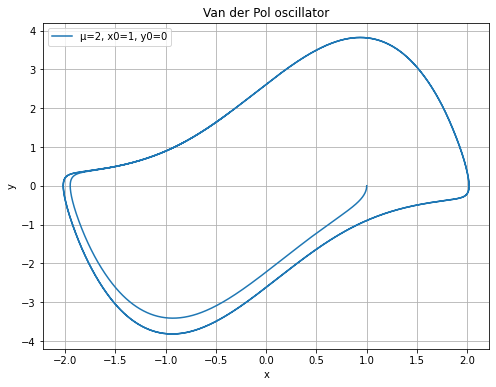

array([0.000000e+00, 1.000000e-05, 2.000000e-05, ..., 1.999998e+01,
       1.999999e+01, 2.000000e+01])

In [3]:
#Van der Pol oscillator system
initial_condition = (1,0)
mu = 2
t_span=(0,20)
t_eval = np.linspace(t_span[0], t_span[1], 2000001)


def van_der_pol(t, state, mu):
    x, y = state
    dxdt = y
    dydt = mu * (1 - x**2) * y - x
    return [dxdt, dydt]


sol = solve_ivp(van_der_pol, t_span, [initial_condition[0], initial_condition[1]], args=(mu,), t_eval=t_eval, vectorized=True) #u sol.y[0] i sol.y[1] su (x,y) koordinate točke za svaki trenutak

#print(sol.y[0].shape, sol.y[1].shape)
#print(sol.t.shape)

plt.figure(figsize=(8,6))
plt.plot(sol.y[0], sol.y[1], label=f"μ={mu}, x0={initial_condition[0]}, y0={initial_condition[1]}")

    
plt.title("Van der Pol oscillator")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

t_eval

(2, 2001)


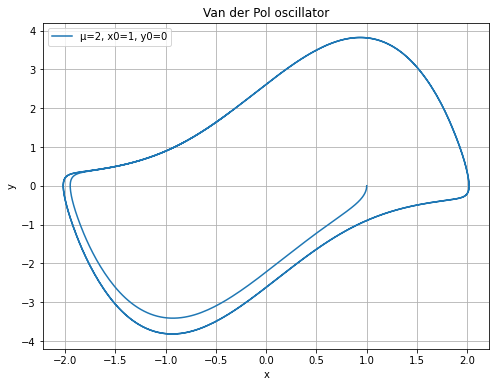

In [4]:
t_used=np.arange(0,2000001,1000)
del (t_eval)
vdp = sol.y[:,t_used]
#vremenski intervali 0.01, od trena 0 do 20
print(vdp.shape)

plt.figure(figsize=(8, 6))
plt.plot(vdp[0,:], vdp[1,:], label=f"μ={mu}, x0={initial_condition[0]}, y0={initial_condition[1]}")

    
plt.title("Van der Pol oscillator")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

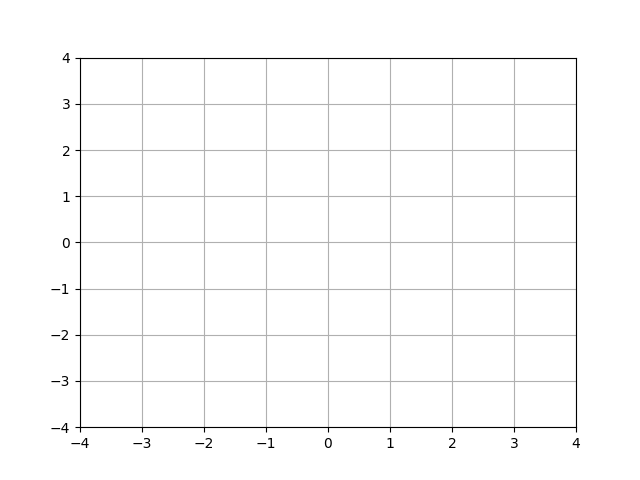

In [5]:
%matplotlib widget

fig, ax = plt.subplots()

line2 = ax.plot(vdp[0,0], vdp[1,0], lw=2)[0]
ax.set_xbound(-4,4); ax.set_ybound(-4,4)
plt.grid()


def update(frame):
    # for each frame, update the data stored on each artist.
    x = vdp[0,:frame]
    y = vdp[1,:frame]
    # update the line plot:
    line2.set_xdata(x)
    line2.set_ydata(y)
    return (line2)


ani = animation.FuncAnimation(fig=fig, func=update, frames=vdp.shape[1], interval=20, blit=True, repeat=False)
plt.show()

In [5]:
%matplotlib inline

Ako ih ne "stackam" uvijek ću dobiti max dva moda (nakon svd-a,...)

In [6]:
num_stack = 60
#num_stack=80 
m=vdp.shape[1]
vdp_end=vdp[:,-num_stack:]
vdp = vdp[:,:(m-num_stack+1)]

for i in range(1,num_stack):
    added=np.concatenate((vdp[:2,i:], vdp[:2,:i]), axis=1)
    vdp=np.vstack((vdp,added))

In [7]:
#provjera jel dobro formirana matrica..

k=np.random.randint(num_stack, m-num_stack)
for i in range(1,num_stack):
    if(np.all(vdp[:2,k]==vdp[2*i:2*i+2,k-i])):
        print(True, end=" ")
    else:
        print(False, vdp[:2,k],vdp[2*i:2*i+2,k-i])

True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True 

In [8]:
m=vdp.shape[1]-1

Z, L = DMD(vdp[:,:m], vdp[:,1:(m+1)], tol=1e-6)
print(L.shape)

(94,)


In [9]:
Z, L, r, _, _ = GEDMDQ(vdp[:,:m+1], tol=1e-6)
print(L.shape)

(88,)


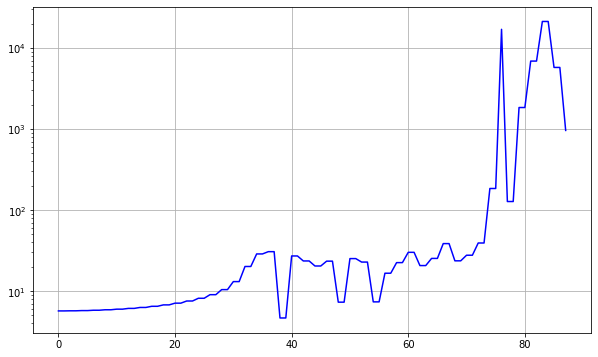

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(1/r, marker='', linestyle='-', color='b')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.grid(True)
plt.show()

In [11]:
threshold = 1e-2
indices = np.where(r<threshold)[0]
print(indices, indices.shape)

[74 75 76 77 78 79 80 81 82 83 84 85 86 87] (14,)


In [12]:
times = [i for i in range(m-100,m+100)]

reconstructed = DMD_reconstruction(vdp[:,:1], Z, indices, L, times)

#lose!!!! 

**uzimamo dio oscilatora - iz toga procjena za dalje**


.

In [13]:
poc=600; zav=700; rec=50

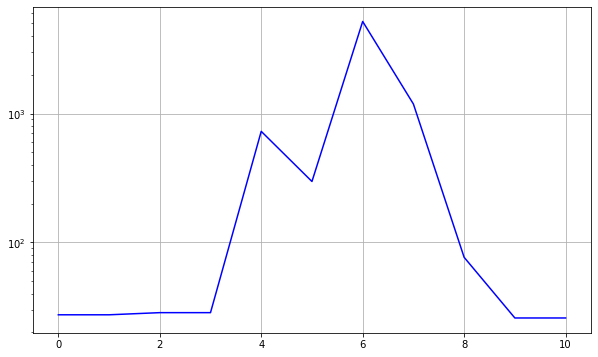

In [14]:
Z, L, r, _, _ = GEDMDQ(vdp[:,poc:zav], tol=1e-6)

plt.figure(figsize=(10, 6))
plt.plot(1/r, marker='', linestyle='-', color='b')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.grid(True)
plt.show()

In [15]:
threshold=1e-2
indices=np.where(r<threshold)[0]
indices.shape

###threshold se mijenja ovisno o tome koliko ih stackam!! 

(4,)

In [16]:
reconstructed = DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices, L, [i for i in range(zav-poc+rec)])

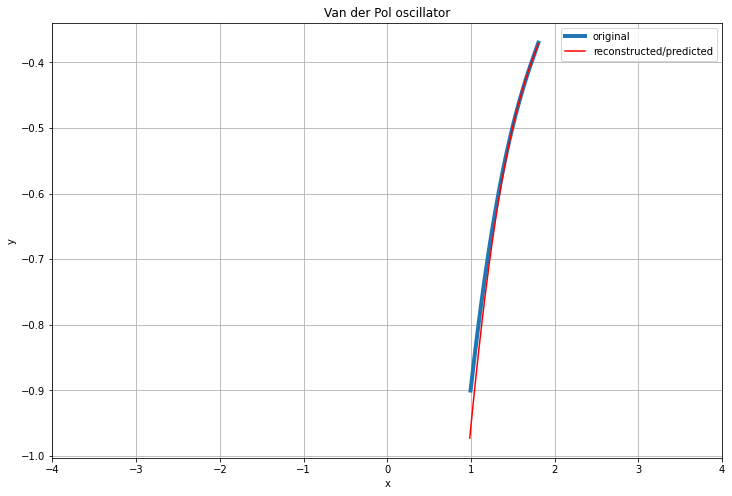

In [17]:
plt.figure(figsize=(12, 8))
plt.plot(vdp[-2,poc:zav+rec], vdp[-1,poc:zav+rec],lw=4, label=f"original")
plt.plot(reconstructed[-2,:], reconstructed[-1,:], label=f"reconstructed/predicted", color="red")

    
plt.title("Van der Pol oscillator")
plt.xlabel("x")
plt.xlim((-4,4)); plt.ylim=((-4,4))
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

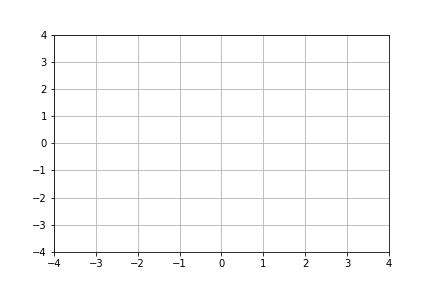

In [18]:
%matplotlib widget

fig, ax = plt.subplots()

line2 = ax.plot(vdp[0,poc], vdp[1,poc], lw=4, color="blue")[0]
line1 = ax.plot(reconstructed[0,0], reconstructed[1,0], lw=2, color="red")[0]
ax.set_xbound(-4,4); ax.set_ybound(-4,4)
plt.grid()


def update(frame):
    # for each frame, update the data stored on each artist.
    x = vdp[0,poc:(poc+frame)]
    y = vdp[1,poc:(poc+frame)]
    x_r = reconstructed[0,:frame]
    y_r = reconstructed[1,:frame]
    # update the line plot:
    line2.set_xdata(x)
    line2.set_ydata(y)
    line1.set_xdata(x_r)
    line1.set_ydata(y_r)
    return (line2, line1)


ani = animation.FuncAnimation(fig=fig, func=update, frames=zav-poc+rec, interval=20, blit=True, repeat=False)
plt.show()

**adding and removing snapshots**


...

In [19]:
%matplotlib inline

(4,)
(40,)
(34,)
(34,)
(22,)
(18,)
(16,)
(14,)
(8,)
(9,)
(9,)


c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=2.05698e-41): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=8.98605e-37): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=7.51505e-42): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=8.50878e-41): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=4.6427e-42): result may not be accurate.
  app.launch_new_instance()


(11,)
(13,)
(13,)
(13,)
(13,)


c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=7.06565e-41): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=2.86069e-42): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=5.08423e-40): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=4.00685e-58): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=3.25166e-57): result may not be accurate.
  app.launch_new_instance()


(13,)
(14,)
(15,)
(16,)
(19,)


c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=2.03857e-49): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=1.16103e-48): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=2.1248e-44): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=9.91957e-42): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=2.35088e-39): result may not be accurate.
  app.launch_new_instance()


(20,)
(21,)
(22,)
(23,)
(26,)
(27,)


c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=1.64054e-37): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=3.52472e-36): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=4.31499e-33): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=1.65788e-30): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=1.98901e-27): result may not be accurate.
  app.launch_new_instance()


(26,)
(26,)
(28,)
(28,)
(28,)


c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=1.22795e-17): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=1.94708e-18): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=3.50457e-18): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=2.97105e-18): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=3.58846e-18): result may not be accurate.
  app.launch_new_instance()


(28,)
(28,)
(28,)
(28,)
(28,)


c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=6.12659e-18): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=6.40419e-18): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=1.14833e-17): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=1.85909e-17): result may not be accurate.
  app.launch_new_instance()


(28,)
(28,)


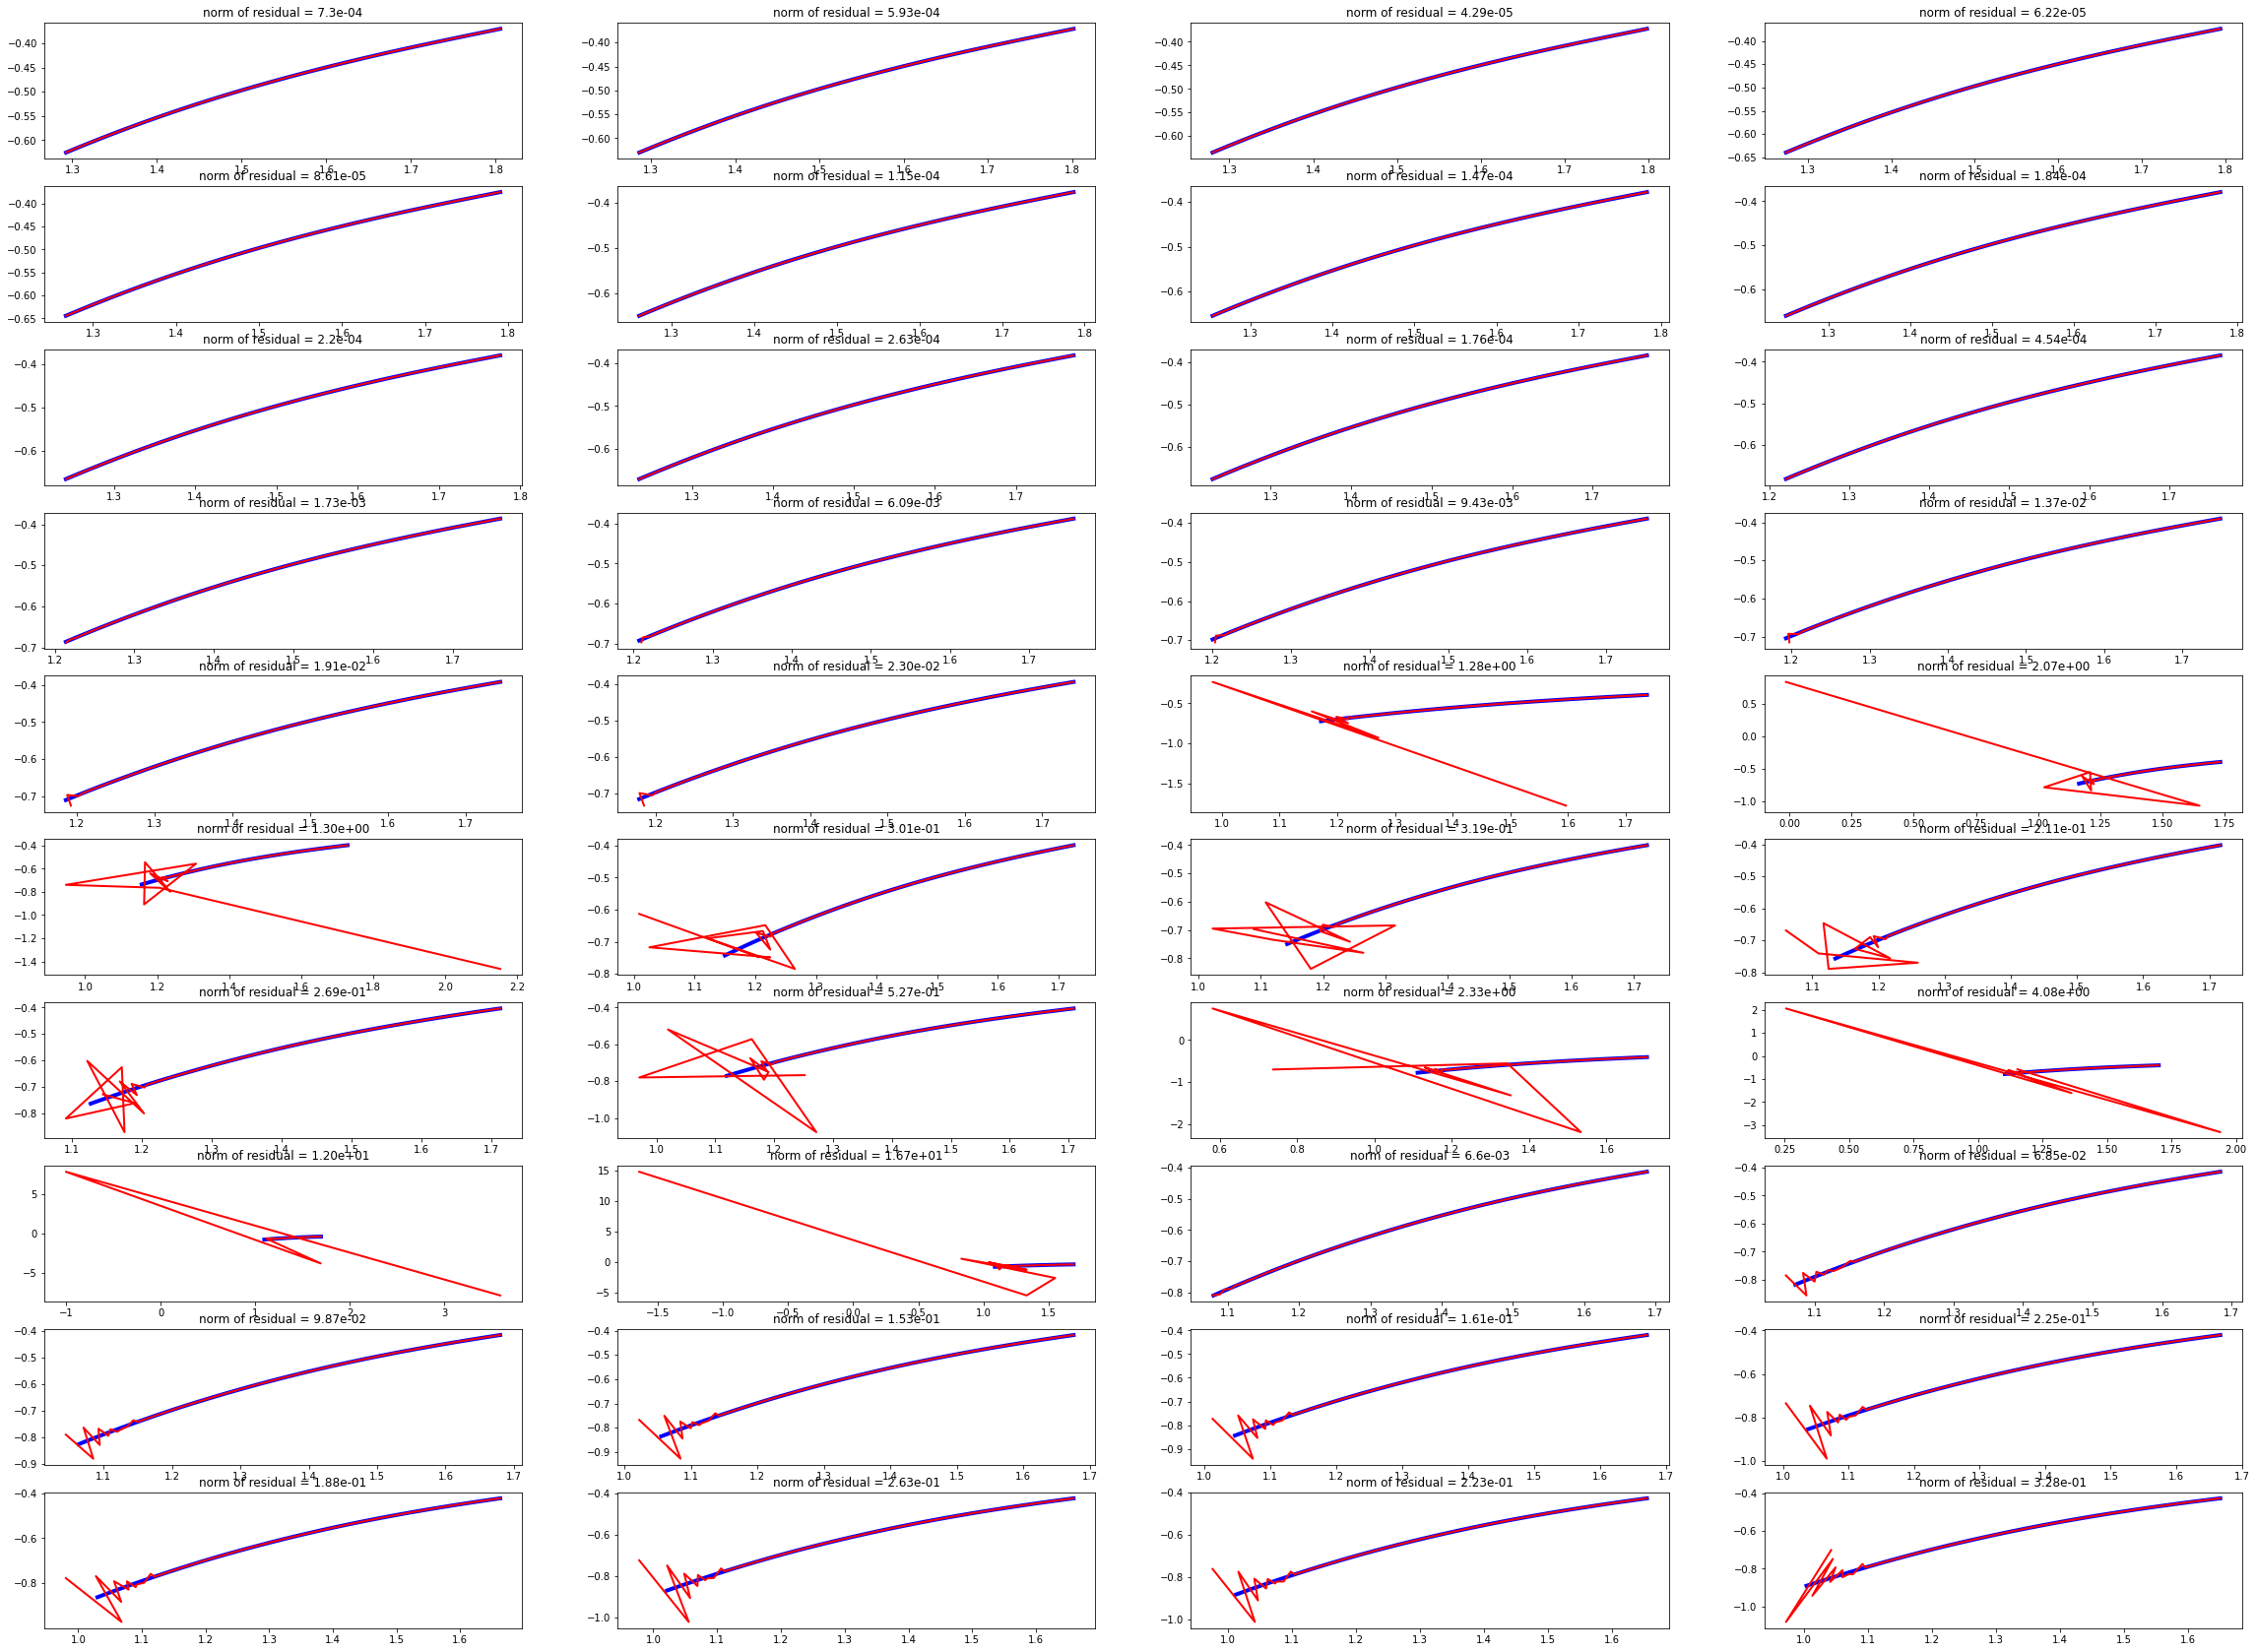

In [20]:
####################################################################################################################################
#           BEZ WEIGHTS i sa tol=1e-12 => problem u linalg.solve - premali tol i numerički rang (tijekom svd) nije dobro procijenjen
#super radi za poc=500, zav=600, sad kada je poc=600, zav=700 ne bas

### ako stavim bez reortogonalizacije (ngram=1) lose!
### ako stavim sa reortg - dobijem sing matricu..
####################################################################################################################################


#dodajem 1
koliko_predvidam=10

poc=600; zav=700


koliko_x=10; koliko_y=4
fig, axs = plt.subplots(koliko_x, koliko_y, figsize=(40,30), squeeze=True)

Z, L, r, Q, R = GEDMDQ(vdp[:,poc:zav])

threshold=1e-2
indices = np.where(r < threshold)[0]
times=[i for i in range(zav-poc+koliko_predvidam)]
predicted=DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices, L, times)
#predicted=DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices, L, times, weights=weights)

axs[0,0].plot(vdp[-2, poc:zav+koliko_predvidam], vdp[-1,poc:zav+koliko_predvidam], color="blue", lw=4) ###koji predvidam? zadnji par ili prvi par??
axs[0,0].plot(predicted[-2,:], predicted[-1,:], color="red", lw=2)
res=np.linalg.norm(predicted[-2:,-koliko_predvidam:]-vdp[-2:,zav:zav+koliko_predvidam])
axs[0,0].set_title("norm of residual = {}".format(np.format_float_scientific(res, precision=2)))


br=0
for i in range(koliko_x):
    for j in range(koliko_y):
        if(i==0 and j==0):
            continue
        poc=poc+1; zav=zav+1
        _,_,_,Q,R,_ = DMD_discarding_snap(1, Q, R)
        
        Z, L, r, Q, R = DMD_added_snap(vdp[:,(zav-1):zav], Q, R, ngram=1)

        indices=np.where(r < threshold)[0]
        print(indices.shape)

        predicted = DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices, L, times)
        
        axs[i,j].plot(vdp[-2, poc:zav+koliko_predvidam], vdp[-1,poc:zav+koliko_predvidam], color="blue", lw=4)
        axs[i,j].plot(predicted[-2,:], predicted[-1,:], color="red", lw=2)
        res=np.linalg.norm(predicted[-2:,-koliko_predvidam:]-vdp[-2:,zav:zav+koliko_predvidam])
        axs[i,j].set_title("norm of residual = {}".format(np.format_float_scientific(res, precision=2)))
        threshold=1/50
    #ako norma res < 1e-1 npr. odsječi sve osim zadnjih k
        """if res > 1/50:
            poc=zav-50
            threshold = 1e-2
            """

### sada i ovaj


(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(11,)
(10,)
(10,)
(10,)
(10,)
(11,)
(11,)
(11,)


c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=6.94289e-29): result may not be accurate.
  app.launch_new_instance()


(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(12,)
(12,)


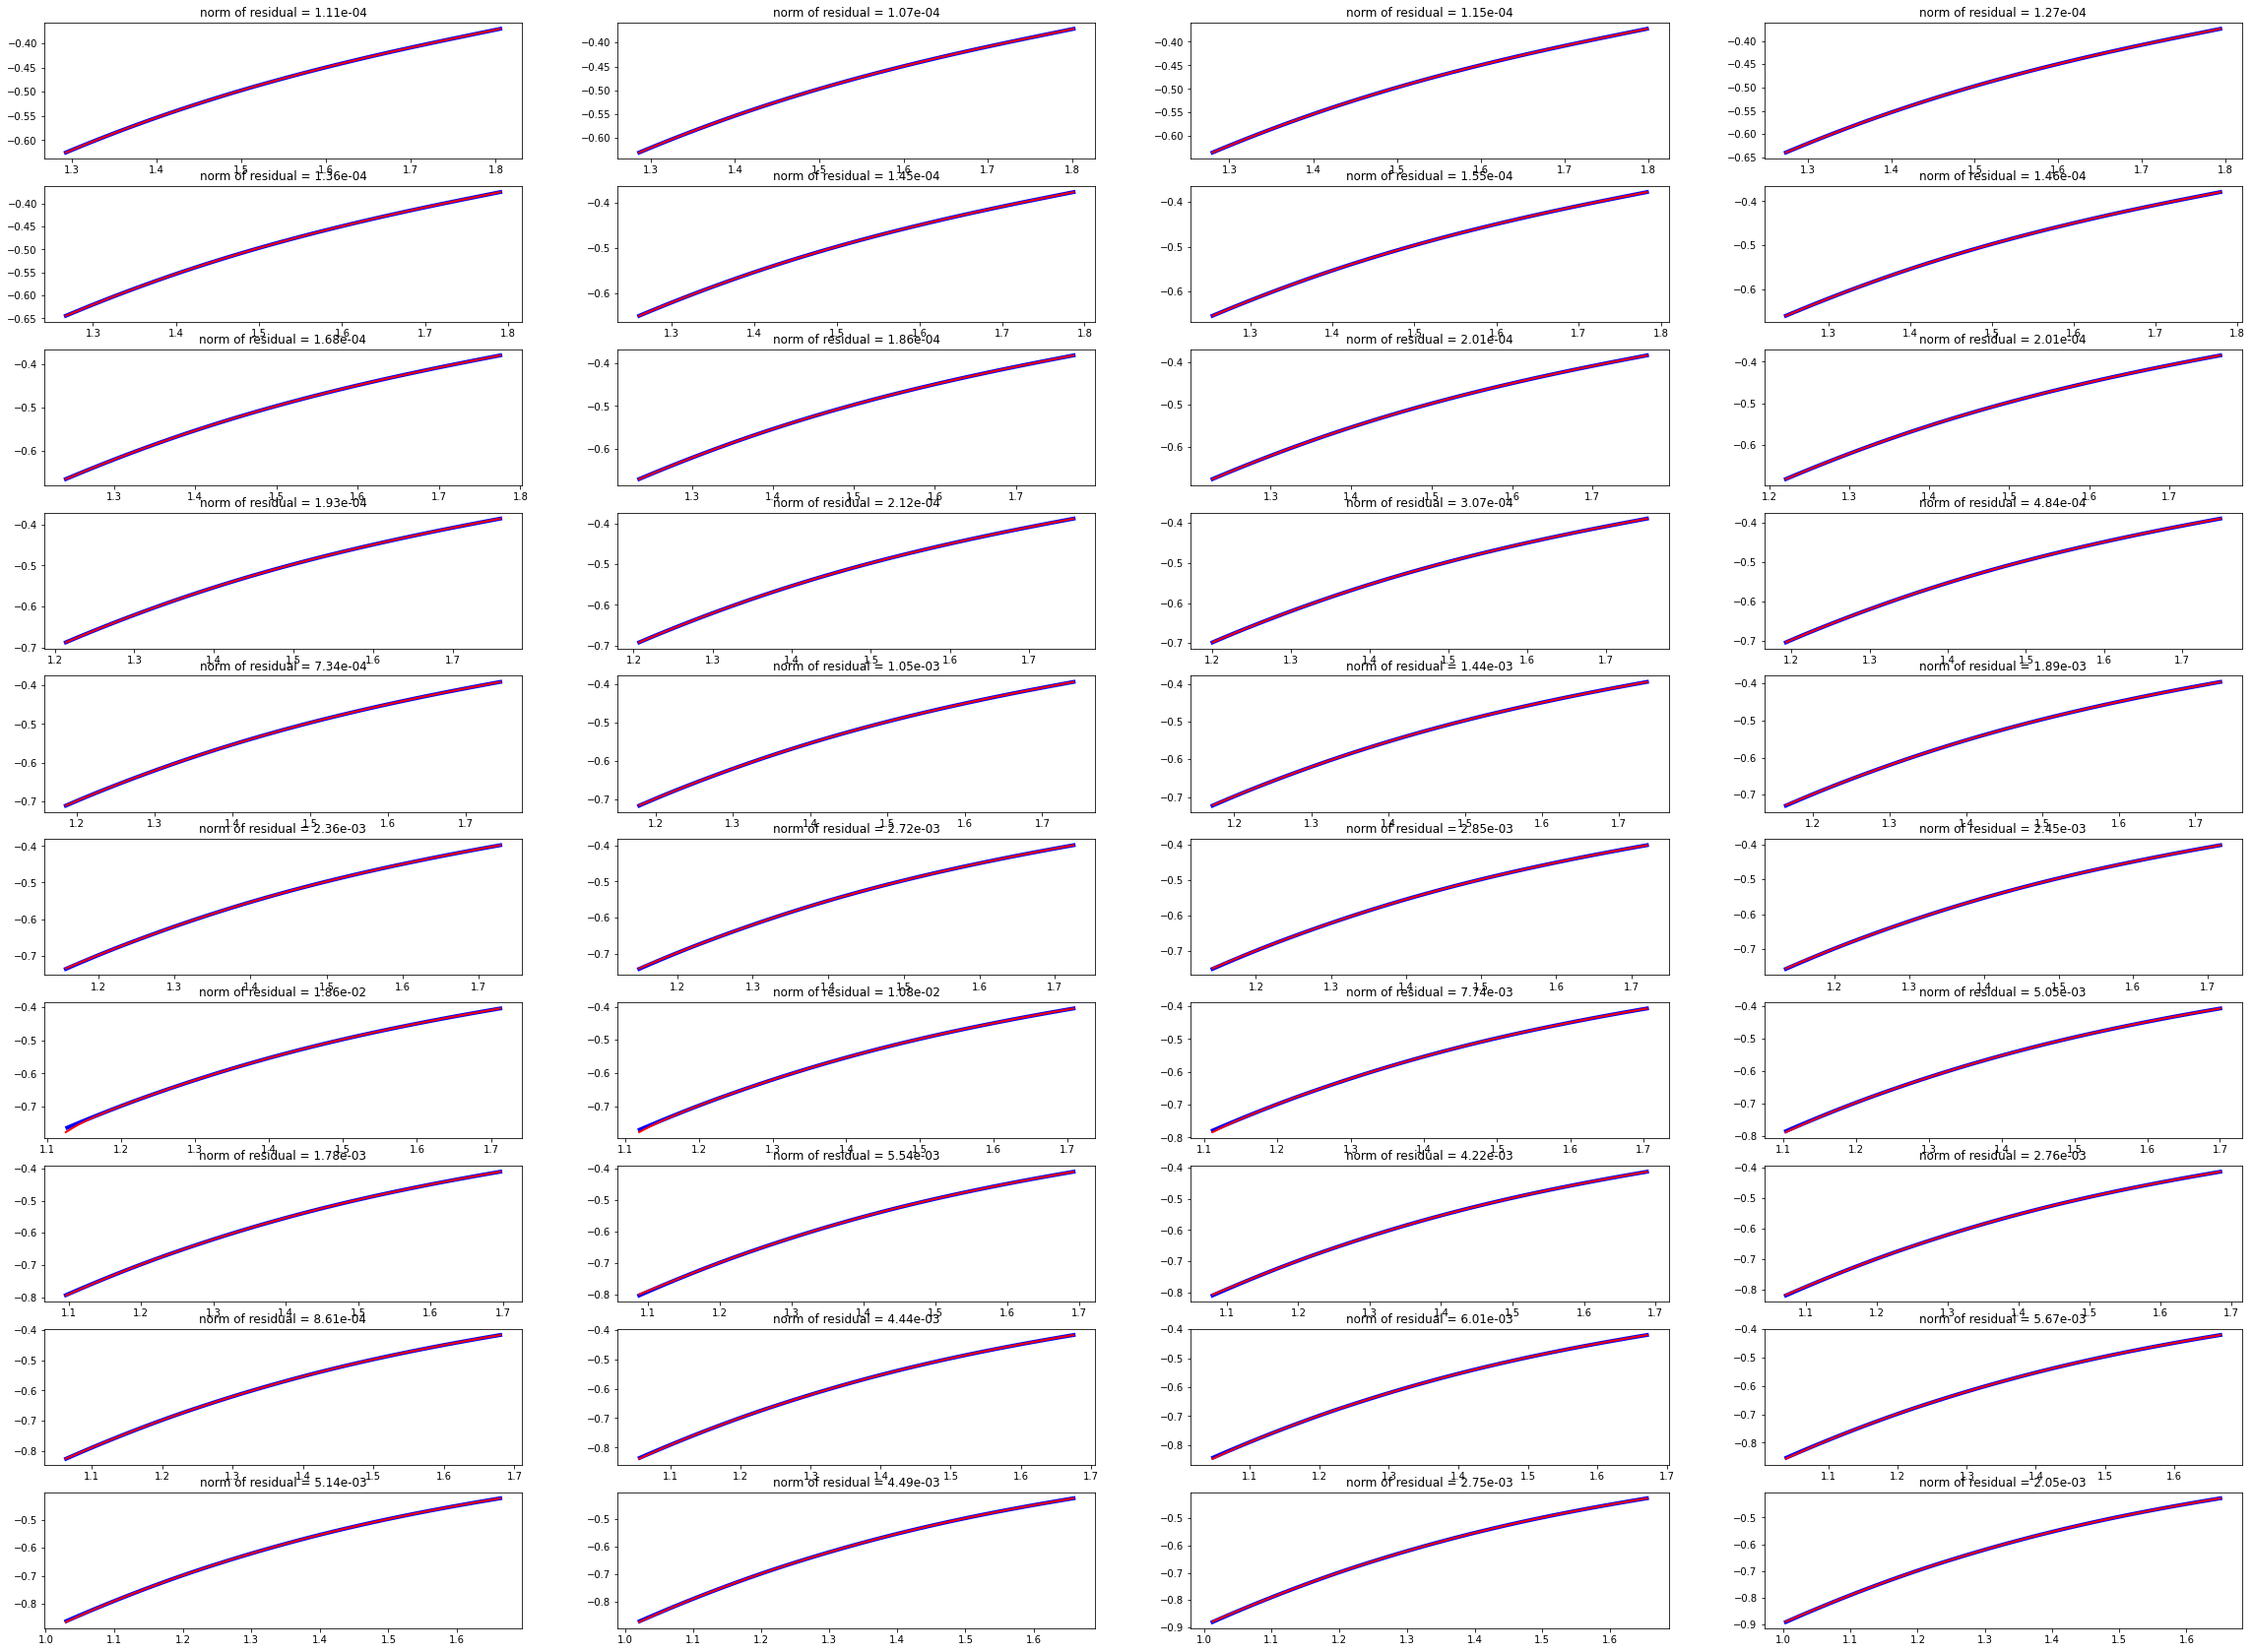

In [21]:
####################################################################################################################################
#           BEZ WEIGHTS i sa vecim tol = 1e-6
####################################################################################################################################

%matplotlib inline
#dodajem 1
koliko_predvidam=10

poc=600; zav=700


koliko_x=10; koliko_y=4
fig, axs = plt.subplots(koliko_x, koliko_y, figsize=(40,30), squeeze=True)

Z, L, r, Q, R = GEDMDQ(vdp[:,poc:zav], tol=1e-6)

threshold=100
indices = np.where(r < threshold)[0]
times=[i for i in range(zav-poc+koliko_predvidam)]
predicted=DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices, L, times)
#predicted=DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices, L, times, weights=weights)

axs[0,0].plot(vdp[-2, poc:zav+koliko_predvidam], vdp[-1,poc:zav+koliko_predvidam], color="blue", lw=4) ###koji predvidam? zadnji par ili prvi par??
axs[0,0].plot(predicted[-2,:], predicted[-1,:], color="red", lw=2)
res=np.linalg.norm(predicted[-2:,-koliko_predvidam:]-vdp[-2:,zav:zav+koliko_predvidam])
axs[0,0].set_title("norm of residual = {}".format(np.format_float_scientific(res, precision=2)))


br=0
for i in range(koliko_x):
    for j in range(koliko_y):
        if(i==0 and j==0):
            continue
        poc=poc+1; zav=zav+1
        _,_,_,Q,R,_ = DMD_discarding_snap(1, Q, R, tol=1e-6)
        
        Z, L, r, Q, R = DMD_added_snap(vdp[:,(zav-1):zav], Q, R, tol=1e-6)

        indices=np.where(r < threshold)[0]
        print(indices.shape)


        predicted = DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices, L, times)
        
        axs[i,j].plot(vdp[-2, poc:zav+koliko_predvidam], vdp[-1,poc:zav+koliko_predvidam], color="blue", lw=4)
        axs[i,j].plot(predicted[-2,:], predicted[-1,:], color="red", lw=2)
        res=np.linalg.norm(predicted[-2:,-koliko_predvidam:]-vdp[-2:,zav:zav+koliko_predvidam])
        axs[i,j].set_title("norm of residual = {}".format(np.format_float_scientific(res, precision=2)))
        threshold=100
    #ako norma res < 1e-1 npr. odsjeci sve osim zadnjih k
        """if res > 1/50:
            poc=zav-50
            threshold = 1e-2
            """


### sada je threshold = 100 - tj uzima sve indekse => bolji rezultati nego kad selektiram

#############################################################################################################################
#mozda nezgodno - trebalo bi threshold mijenjati..
    #kada nesto "krivo" obicno jer je previsoki threshold. Npr ovaj primjer sa 1e-2 i sa 1/50 daju razlicite rezultate. za poce4tak dobro radi i 1e-2, ali za kasnije ne..
        #mozda ako je norma prevelika - prvo provjeriti hoce li manji threshold poboljsati rezultate, a potom tek rezati rep.

In [22]:
####################################################################################################################################
#           oduzimam i dodajem
####################################################################################################################################


#dodajem 1
koliko_predvidam=1

poc=0; zav=100

Z, L, r, Q, R = GEDMDQ(vdp[:,poc:zav], tol=1e-6)  ######################## Bilo je potrebno smanjiti tolerance (za odredivanje numerickog ranga) - sad vise nema ni linalg error u solve:)

threshold=1e-2
indices = np.where(r < threshold)[0]
times=[100]
predicted=np.empty(vdp[:,100:].shape)
predicted[:,0]=DMD_reconstruction(vdp[:,poc:zav-1], Z, indices, L, times).reshape(-1)
#predicted=DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices, L, times, weights=weights)



for i in range(1,vdp.shape[1]-100):
        zav=zav+1
        poc=poc+1
        _,_,_,Q,R,_ = DMD_discarding_snap(1, Q, R, tol=1e-6)

        Z, L, r, Q, R = DMD_added_snap(vdp[:,(zav-1):zav], Q, R, tol=1e-6, ngram=5)
        #print(np.allclose(Q@R, vdp[:,poc:zav])) - jako dobra procjena 

        
        indices=np.where(r < threshold)[0]
        #print(indices.shape)

        """if(i%100==0):
            print("ortogonalnost", np.allclose(Q.T@Q, np.eye(Q.shape[1], Q.shape[1])))  ###ostaje ortogonalno sada:)"""

        predicted[:,i] = DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices, L, times).reshape(-1)

        res=np.linalg.norm(predicted[-2:,-koliko_predvidam:]-vdp[-2:,zav:zav+koliko_predvidam])


### sada je i brze nego kad smo imali bez reortogonalizacije jer je tamo bilo puno ill-cond matrica, cesto se za solve radila nova instanca...

c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=1.70511e-82): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=5.04256e-74): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=7.99396e-58): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=6.23968e-52): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=7.98228e-46): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\minic

In [24]:
np.allclose(Q.T@Q, np.eye(Q.shape[1],Q.shape[1]))

True

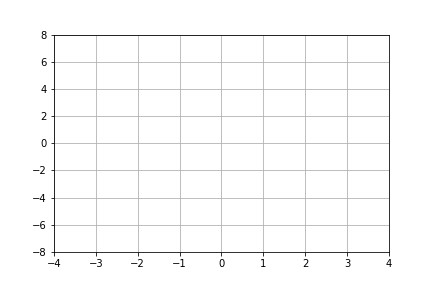

In [25]:
%matplotlib widget
fig, ax = plt.subplots()

line2 = ax.plot(vdp[-2,99], vdp[-1,99], lw=4, color="blue")[0]
line1 = ax.plot(predicted[-2,0], predicted[-1,0], lw=2, color="red")[0]
ax.set_xbound(-4,4); ax.set_ybound(-8,8)
plt.grid()

def update(frame):
    # for each frame, update the data stored on each artist.
    x = vdp[-2,100:(100+frame)]
    y = vdp[-1,100:(100+frame)]
    x_r = predicted[-2,:frame]
    y_r = predicted[-1,:frame]
    # update the line plot:
    line2.set_xdata(x)
    line2.set_ydata(y)
    line1.set_xdata(x_r)
    line1.set_ydata(y_r)
    #legend.get_texts()[0].set_text(f'time={frame}, res={res}')
    return (line2, line1)


ani = animation.FuncAnimation(fig=fig, func=update, frames=vdp.shape[1]-100, interval=50, blit=True, repeat=False)
plt.show()

##zasto sa changing mu radi bolje - gdje je razlika??

#Hemati - proba


(11, 99) (11, 99) (11, 11) (11, 11) (11, 11)


c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=7.6949e-129): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=3.01548e-56): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=1.61627e-51): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=3.2674e-39): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=1.32927e-22): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\minico

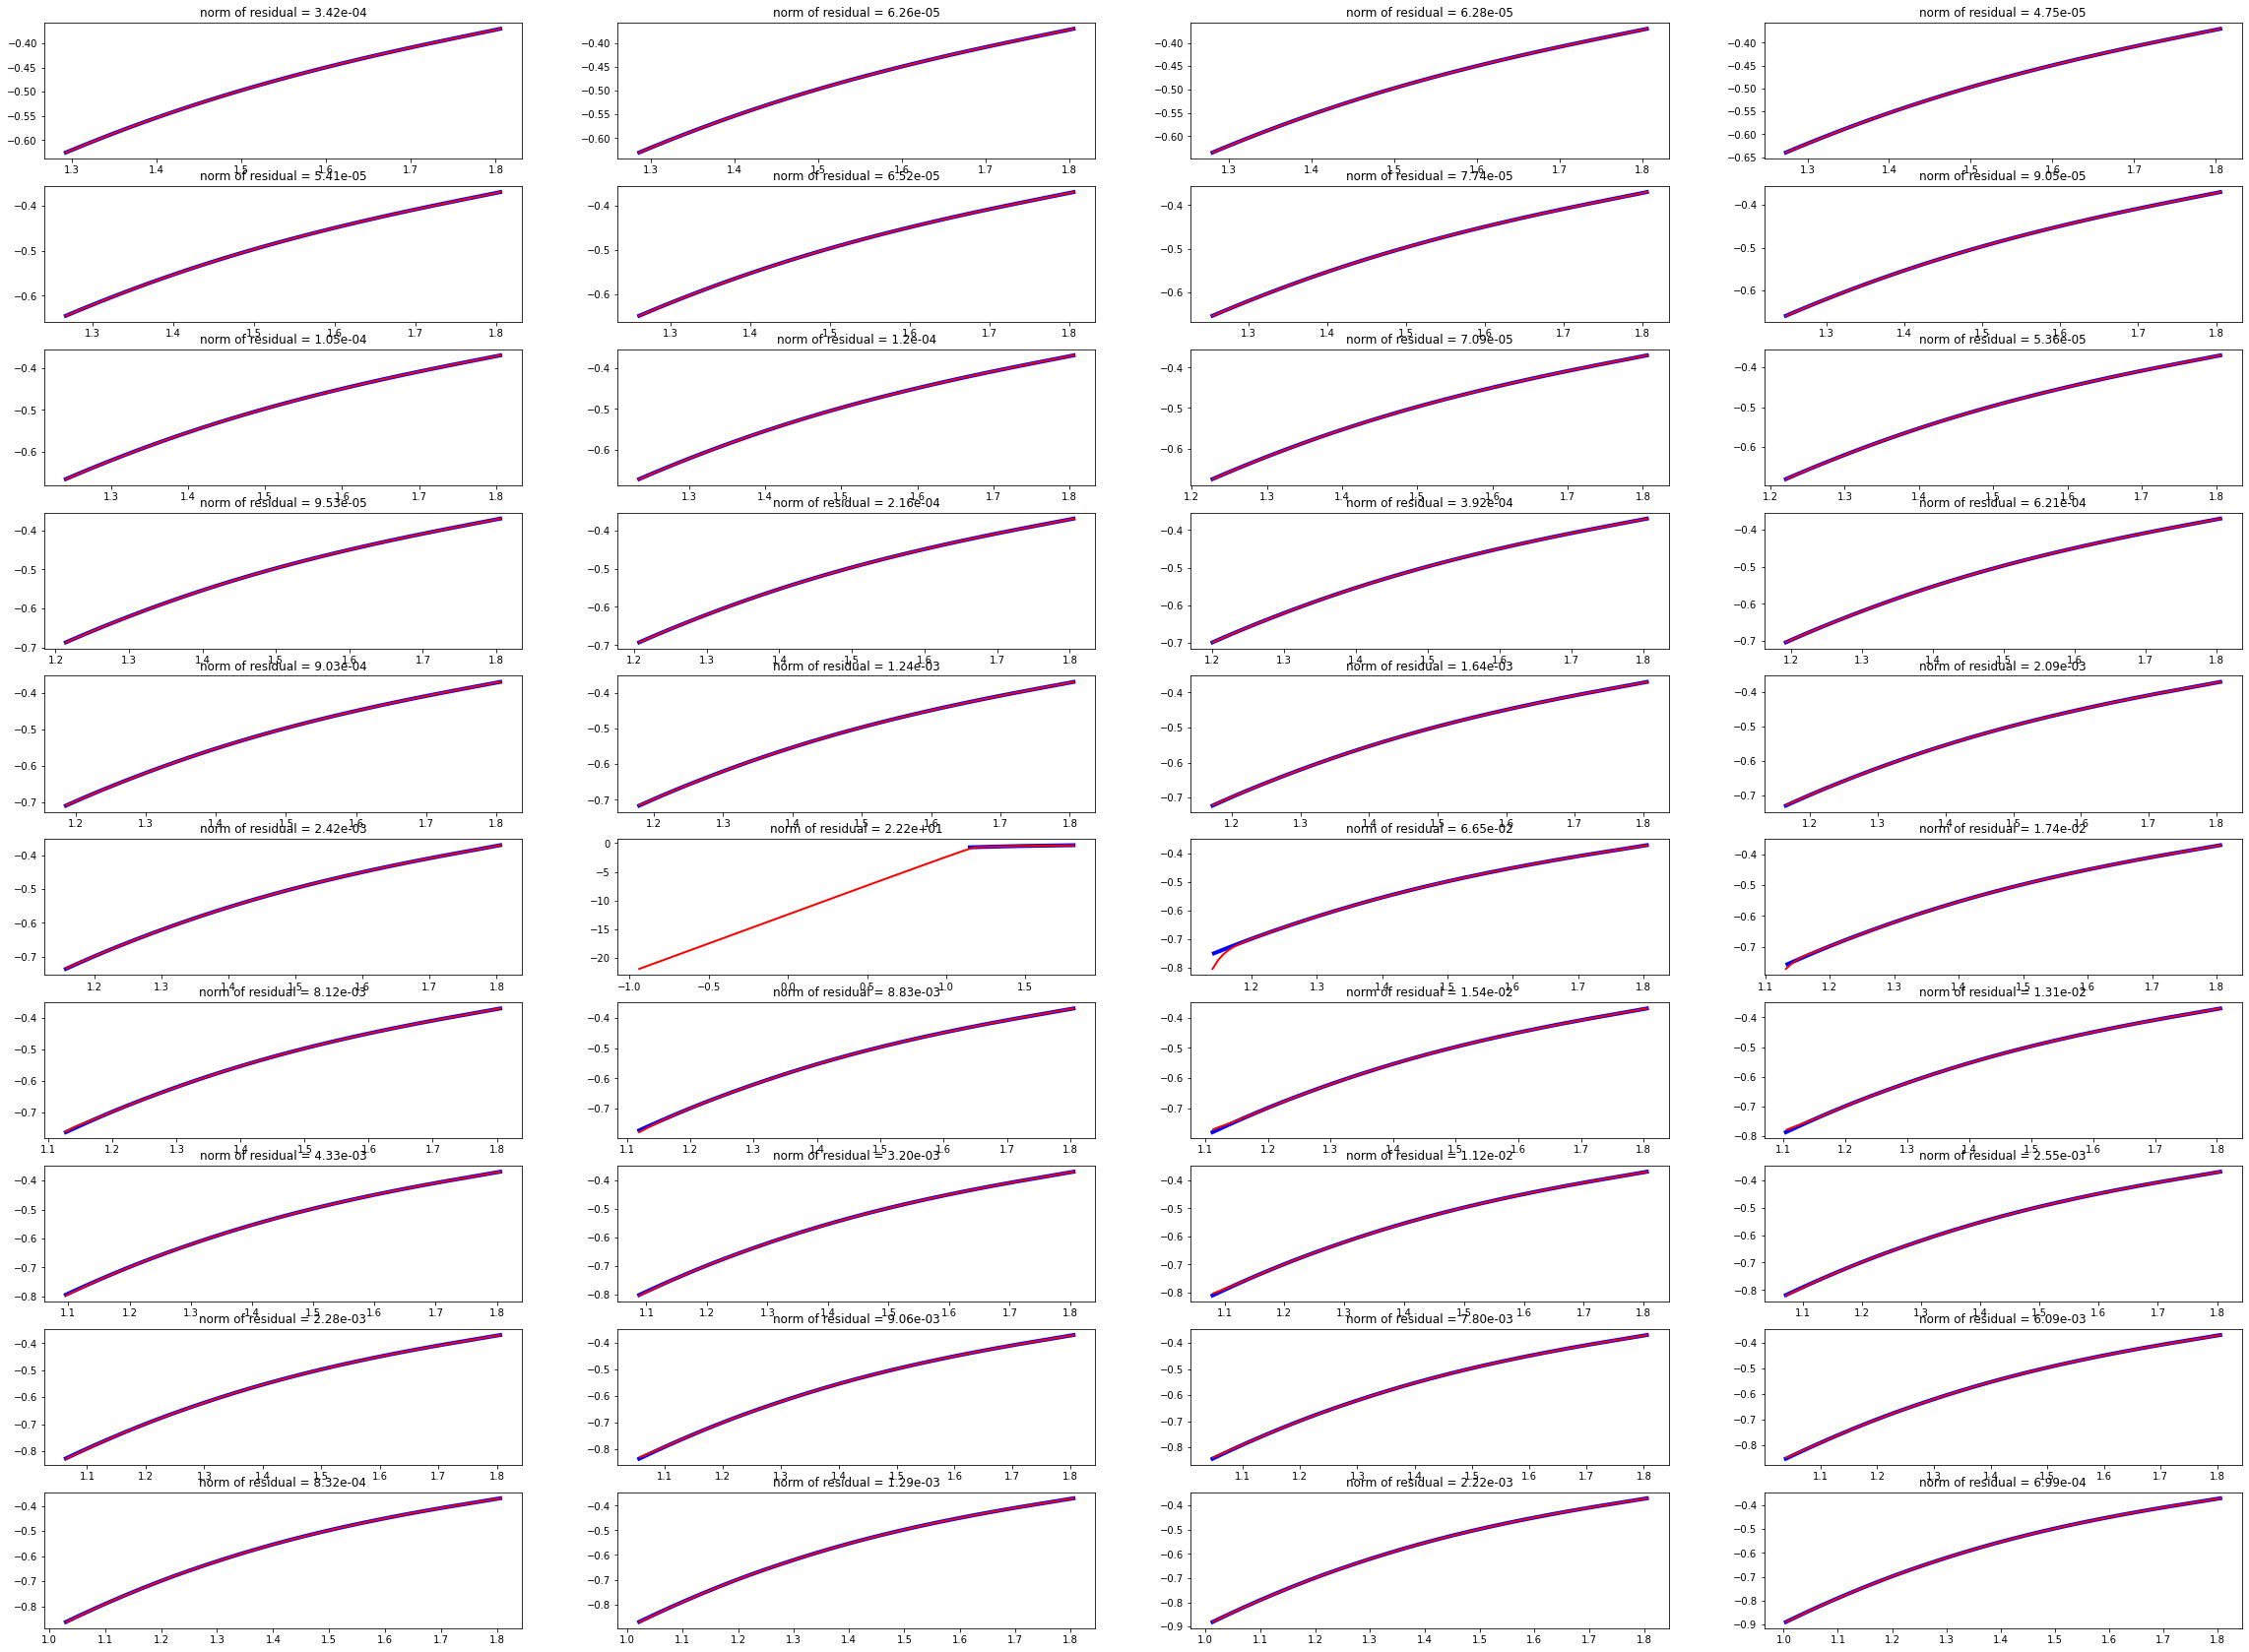

In [26]:
####################################################################################################################################
#           Hemati DMD
####################################################################################################################################

%matplotlib inline
#dodajem 1
koliko_predvidam=10

poc=600; zav=700


koliko_x=10; koliko_y=4
fig, axs = plt.subplots(koliko_x, koliko_y, figsize=(40,30), squeeze=True)

Z, L, r, Q, R = GEDMDQ(vdp[:,poc:zav], tol=1e-6)


threshold=1/50
indices = np.where(r < threshold)[0]
times=[i for i in range(zav-poc+koliko_predvidam)]
predicted=DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices, L, times)
#predicted=DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices, L, times, weights=weights)

axs[0,0].plot(vdp[-2, poc:zav+koliko_predvidam], vdp[-1,poc:zav+koliko_predvidam], color="blue", lw=4) ###koji predvidam? zadnji par ili prvi par??
axs[0,0].plot(predicted[-2,:], predicted[-1,:], color="red", lw=2)
res=np.linalg.norm(predicted[-2:,-koliko_predvidam:]-vdp[-2:,zav:zav+koliko_predvidam])
axs[0,0].set_title("norm of residual = {}".format(np.format_float_scientific(res, precision=2)))

tol=1e-6
U_x, Sigma, _ = np.linalg.svd(vdp[:,poc:zav-1],full_matrices=False) 
k=m
for i in range(1,m):
    if(Sigma[i]<=Sigma[0]*tol):
        k=i
        break
U_x = U_x[:, :k]

U_y, Sigma, _ = np.linalg.svd(vdp[:,poc+1:zav],full_matrices=False) 
k=m
for i in range(1,m):
    if(Sigma[i]<=Sigma[0]*tol):
        k=i
        break
U_y = U_y[:, :k]

X_tilda=U_x.T@vdp[:,poc:zav-1]; Y_tilda=U_y.T@vdp[:,poc+1:zav]
A = Y_tilda@X_tilda.T; Gx=X_tilda@X_tilda.T; Gy = Y_tilda@Y_tilda.T

print(X_tilda.shape, Y_tilda.shape, A.shape, Gx.shape, Gy.shape)
x=vdp[:,zav-1:zav]

br=0
for i in range(koliko_x):
    for j in range(koliko_y):
        if(i==0 and j==0):
            continue
        poc=poc; zav=zav+1
        times=[i for i in range(zav-poc+koliko_predvidam)]
        y=vdp[:,zav-1:zav]

        #tu sam stala
        U_x, U_y, A, Gx, Gy = Hemati_update(U_x, U_y, A, Gx, Gy, x, y)
        Z, L = Hemati_compute_modes(U_x, U_y, A, Gx)
        #print(Z.shape, L.shape) (12,120) i (12,) u prvoj iteraciji
        indices=np.where(abs(L)<1e6)[0]
        #print(L.shape, indices.shape) (12,) i (12,) = isti, uzme sve:)

        predicted = DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices, L, times)
        
        axs[i,j].plot(vdp[-2, poc:zav+koliko_predvidam], vdp[-1,poc:zav+koliko_predvidam], color="blue", lw=4)
        axs[i,j].plot(predicted[-2,:], predicted[-1,:], color="red", lw=2)
        res=np.linalg.norm(predicted[-2:,-koliko_predvidam:]-vdp[-2:,zav:zav+koliko_predvidam])
        axs[i,j].set_title("norm of residual = {}".format(np.format_float_scientific(res, precision=2)))
        x=y
    #ako norma res < 1e-1 npr. odsjeci sve osim zadnjih k
        """if res > 1/50:
            poc=zav-50
            threshold = 1e-2
            """



###linalg warning - prije dodavanja - mozda provjeriti je li vec sadrzan... procjeriti u fji za Q.T @ B je li nesto "skoro" nula?...

#############################################################################################################################
#mozda nezgodno - trebalo bi threshold mijenjati..
    #kada nesto "krivo" obicno jer je previsoki threshold. Npr ovaj primjer sa 1e-2 i sa 1/50 daju razlicite rezultate. za poce4tak dobro radi i 1e-2, ali za kasnije ne..
        #mozda ako je norma prevelika - prvo provjeriti hoce li manji threshold poboljsati rezultate, a potom tek rezati rep.

Za usporedbu s Hemati DMD - stackamo 200 snapshotova

In [27]:
vdp = sol.y[:,t_used]
num_stack = 200  ## cak bolje za 80 stackanih nego 200...
num_stack=80 
m=vdp.shape[1]
vdp_end=vdp[:,-num_stack:]
vdp = vdp[:,:(m-num_stack+1)]

for i in range(1,num_stack):
    added=np.concatenate((vdp[:2,i:], vdp[:2,:i]), axis=1)
    vdp=np.vstack((vdp,added))

In [28]:
### Hemati - samo dodajem dok ne dodam sve..

#dodajem 1
koliko_predvidam=1

poc=0; zav=100
m=vdp[:,poc:zav-1].shape[1]

Z, L, r, Q, R = GEDMDQ(vdp[:,poc:zav], tol=1e-6) 

times=[zav]

indices1=np.where(abs(L) < 1e6)[0] 

predicted=np.empty(vdp[:,100:850].shape)
predicted_H = np.empty(vdp[:,100:850].shape)
#predicted[:,0]=DMD_reconstruction(vdp[:,poc:zav-1], Z, indices1, L, times).reshape(-1)
predicted_H[:,0] = DMD_reconstruction(vdp[:,poc:zav-1], Z, indices1, L, times).reshape(-1)


tol=1e-6 #sa 1e-8 - greska u predicted..
U_x, Sigma, _ = np.linalg.svd(vdp[:,poc:zav-1],full_matrices=False) 
k=m
for i in range(1,m):
    if(Sigma[i]<=Sigma[0]*tol):
        k=i
        break
U_x = U_x[:, :k]

U_y, Sigma, _ = np.linalg.svd(vdp[:,poc+1:zav],full_matrices=False) 
k=m
for i in range(1,m):
    if(Sigma[i]<=Sigma[0]*tol):
        k=i
        break
U_y = U_y[:, :k]

X_tilda=U_x.T@vdp[:,poc:zav-1]; Y_tilda=U_y.T@vdp[:,poc+1:zav]
A = Y_tilda@X_tilda.T; Gx=X_tilda@X_tilda.T; Gy = Y_tilda@Y_tilda.T


x=vdp[:,zav-1:zav]



for i in range(1,750):
        zav=zav+1
        poc=poc
        times=[zav]
        y=vdp[:,zav-1:zav]

        #Z, L, r, Q, R = DMD_added_snap(vdp[:,(zav-1):zav], Q, R, tol=1e-6, ngram=5)

        U_x, U_y, A, Gx, Gy = Hemati_update(U_x, U_y, A, Gx, Gy, x, y, r0=200) #ako povecam epsilon na 1e-6 => jos gori rezultati! - vjerojatno je bolje ako uvijek dodajem..
        Zh, Lh = Hemati_compute_modes(U_x, U_y, A, Gx)

        #za nas kod ako ne rezem - dobijem overflow
        #indices1=np.where(r < 1e-2)[0] 

        ##uzet cu sve indekse
        indices2 = np.where(abs(Lh) < 1e6)[0]

        #predicted[:,i] = DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices1, L, times).reshape(-1)
        predicted_H[:,i] = DMD_reconstruction(vdp[:,poc:(zav-1)], Zh, indices2, Lh, times).reshape(-1)

        #res1=np.linalg.norm(predicted[-2:,-koliko_predvidam:]-vdp[-2:,zav:zav+koliko_predvidam])
        res2=np.linalg.norm(predicted_H[-2:,-koliko_predvidam:]-vdp[-2:,zav:zav+koliko_predvidam])
        
        x=y

        

c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=7.95638e-17): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=1.41771e-22): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=1.91646e-18): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=3.29092e-20): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=8.94386e-20): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\minic

In [29]:
%matplotlib inline

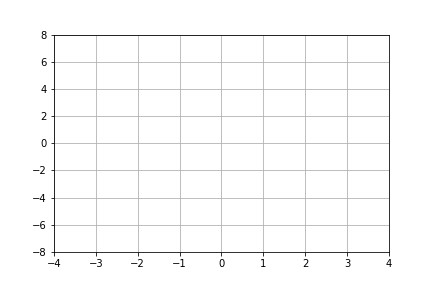

In [30]:
############ njihovo - radi dobro dok broj snapshota ne prestigne dužinu snapshota

%matplotlib widget
fig, ax = plt.subplots()

line2 = ax.plot(vdp[-2,99], vdp[-1,99], lw=4, color="blue")[0]
line1 = ax.plot(predicted_H[-2,0], predicted_H[-1,0], lw=2, color="red")[0]
ax.set_xbound(-4,4); ax.set_ybound(-8,8)
plt.grid()

def update(frame):
    # for each frame, update the data stored on each artist.
    x = vdp[-2,100:(100+frame)]
    y = vdp[-1,100:(100+frame)]
    x_r = predicted_H[-2,:frame]
    y_r = predicted_H[-1,:frame]
    # update the line plot:
    line2.set_xdata(x)
    line2.set_ydata(y)
    line1.set_xdata(x_r)
    line1.set_ydata(y_r)
    #legend.get_texts()[0].set_text(f'time={frame}, res={res}')
    return (line2, line1)


ani = animation.FuncAnimation(fig=fig, func=update, frames=750, interval=50, blit=True, repeat=False) #do 200-tog frame-a jako dobro radi.
plt.show()


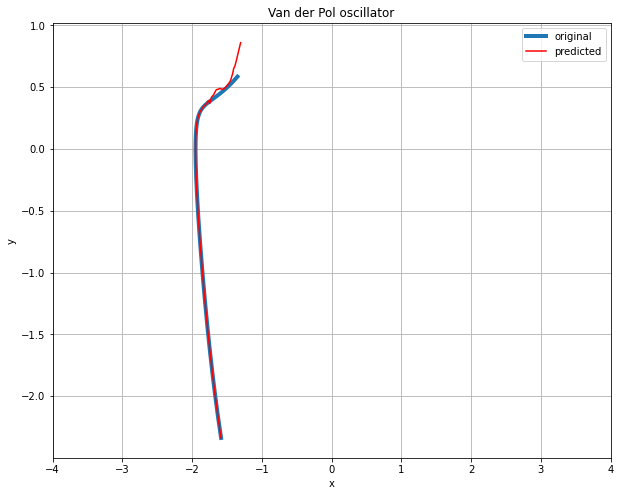

In [58]:
%matplotlib inline
plt.figure(figsize=(10,8))
#plt.plot(vdp[-2,100:850], vdp[-1,100:850],lw=4, label=f"original")
#plt.plot(predicted_H[-2,:], predicted_H[-1,:], label=f"predicted", color="red")

plt.plot(vdp[-2,100:300], vdp[-1,100:300],lw=4, label=f"original")
plt.plot(predicted_H[-2,:200], predicted_H[-1,:200], label=f"predicted", color="red")

    
plt.title("Van der Pol oscillator")
plt.xlabel("x")
plt.xlim((-4,4))
#plt.xlim((-2.3,-1))  - za manji
plt.ylim=((-4,4))
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

In [75]:
####################################################################################################################################
#           oduzimam i dodajem
####################################################################################################################################


#dodajem 1
koliko_predvidam=1

poc=0; zav=100

Z, L, r, Q, R = GEDMDQ(vdp[:,poc:zav], tol=1e-6)  ######################## Bilo je potrebno smanjiti tolerance (za odredivanje numerickog ranga) - sad vise nema ni linalg error u solve:)

threshold=1
threshold_real=1e-1
indices = np.where(r < threshold)[0]
indices_real = np.where(r < threshold_real)[0]
times=[100]
predicted=np.empty((vdp[:,100:].shape[0], 750)); predicted_thresh=np.empty((vdp[:,100:].shape[0], 750))
predicted[:,0]=DMD_reconstruction(vdp[:,poc:zav-1], Z, indices, L, times).reshape(-1)
predicted_thresh[:,0] = DMD_reconstruction(vdp[:,poc:zav-1], Z, indices, L, times).reshape(-1)



for i in range(1,750):
        zav=zav+1
        poc=poc+1
        _,_,_,Q,R,_ = DMD_discarding_snap(1, Q, R, tol=1e-6)

        Z, L, r, Q, R = DMD_added_snap(vdp[:,(zav-1):zav], Q, R, tol=1e-6, ngram=5)
        #print(np.allclose(Q@R, vdp[:,poc:zav])) - jako dobra procjena 

        
        indices=np.where(r < threshold)[0]
        indices_real = np.where(r < threshold_real)[0]
        #print(indices.shape)

        """if(i%100==0):
            print("ortogonalnost", np.allclose(Q.T@Q, np.eye(Q.shape[1], Q.shape[1])))  ###ostaje ortogonalno sada:)"""

        predicted[:,i] = DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices, L, times).reshape(-1)
        predicted_thresh[:,i] = DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices_real, L, times).reshape(-1)

        res=np.linalg.norm(predicted[-2:,-koliko_predvidam:]-vdp[-2:,zav:zav+koliko_predvidam])


### sada je i brze nego kad smo imali bez reortogonalizacije jer je tamo bilo puno ill-cond matrica, cesto se za solve radila nova instanca...

c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=2.88557e-17): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=4.09322e-17): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=3.8369e-17): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=5.22978e-17): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: LinAlgWarning: Ill-conditioned matrix (rcond=2.43411e-30): result may not be accurate.
  app.launch_new_instance()
c:\Users\elawi\minico

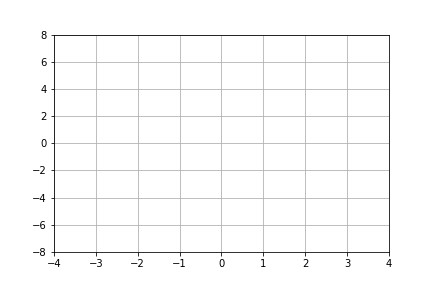

In [79]:
%matplotlib widget
fig, ax = plt.subplots()

line2 = ax.plot(vdp[-2,99], vdp[-1,99], lw=4, color="blue")[0]
line1 = ax.plot(predicted_thresh[-2,0], predicted_thresh[-1,0], lw=2, color="red")[0]
#line1 = ax.plot(predicted_thresh[-2,0], predicted_thresh[-1,0], lw=2, color="red")[0]
ax.set_xbound(-4,4); ax.set_ybound(-8,8)
plt.grid()

def update(frame):
    # for each frame, update the data stored on each artist.
    x = vdp[-2,100:(100+frame)]
    y = vdp[-1,100:(100+frame)]
    x_r = predicted_thresh[-2,:frame]
    y_r = predicted_thresh[-1,:frame]
    #x_r = predicted_thresh[-2,:frame]
    #y_r = predicted_thresh[-1,:frame]
    # update the line plot:
    line2.set_xdata(x)
    line2.set_ydata(y)
    line1.set_xdata(x_r)
    line1.set_ydata(y_r)
    #legend.get_texts()[0].set_text(f'time={frame}, res={res}')
    return (line2, line1)


ani = animation.FuncAnimation(fig=fig, func=update, frames=750, interval=30, blit=True, repeat=False)
plt.show()

##radi puno puno bolje ako ne stavljam threshold

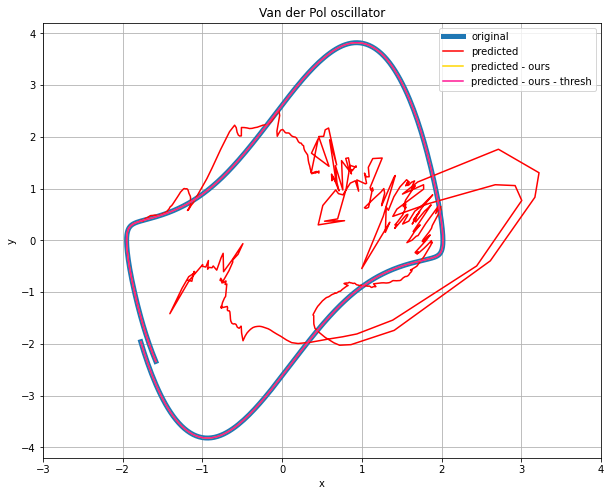

In [89]:
%matplotlib inline
plt.figure(figsize=(10,8))
plt.plot(vdp[-2,100:850], vdp[-1,100:850],lw=5, label=f"original")
plt.plot(predicted_H[-2,:], predicted_H[-1,:], label=f"predicted", color="red")
plt.plot(predicted[-2,:], predicted[-1,:], label=f"predicted - ours", color="gold")
plt.plot(predicted_thresh[-2,:], predicted_thresh[-1,:], label=f"predicted - ours - thresh", color = "deeppink")

#plt.plot(vdp[-2,100:300], vdp[-1,100:300],lw=5, label=f"original")
#plt.plot(predicted_H[-2,:200], predicted_H[-1,:200], label=f"predicted", color="red")
#plt.plot(predicted[-2,:200], predicted[-1,:200], label=f"predicted - ours", color="yellow")

    
plt.title("Van der Pol oscillator")
plt.xlabel("x")
plt.xlim((-3,4))
#plt.xlim((-2.3,-1))  #- za manji
plt.ylim=((-4,4))
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()